# Seattle capstone project

# Introduction
We will be looking at Seattle's motor collision details and try to figure out if we can predict the severity of an accident based on its features. We will also be looking through our features to see if we can find something that may help us prevent accidents from happening. 

Import base libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Grab csv file to dataframe

In [2]:
df = pd.read_csv('Data-Collisions.csv', dtype={'ST_COLCODE': object})

Check head

In [3]:
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


# Data Cleanup
Let's look through the data and see what features we don't need.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 38 columns):
SEVERITYCODE      194673 non-null int64
X                 189339 non-null float64
Y                 189339 non-null float64
OBJECTID          194673 non-null int64
INCKEY            194673 non-null int64
COLDETKEY         194673 non-null int64
REPORTNO          194673 non-null object
STATUS            194673 non-null object
ADDRTYPE          192747 non-null object
INTKEY            65070 non-null float64
LOCATION          191996 non-null object
EXCEPTRSNCODE     84811 non-null object
EXCEPTRSNDESC     5638 non-null object
SEVERITYCODE.1    194673 non-null int64
SEVERITYDESC      194673 non-null object
COLLISIONTYPE     189769 non-null object
PERSONCOUNT       194673 non-null int64
PEDCOUNT          194673 non-null int64
PEDCYLCOUNT       194673 non-null int64
VEHCOUNT          194673 non-null int64
INCDATE           194673 non-null object
INCDTTM           194673 non-null obje

We'll create a heatmap to see what values are missing. We can also see what values are missing by looking at the info tab, but heatmaps allow us to see the missing values much more easily. 

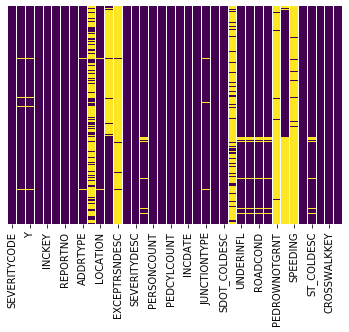

In [5]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Let's check for duplicate values and delete them if there are any. 

In [6]:
df['OBJECTID'].value_counts()

2047     1
1194     1
58550    1
64693    1
62644    1
        ..
96890    1
90745    1
92792    1
70263    1
2049     1
Name: OBJECTID, Length: 194673, dtype: int64

Since there are no duplicates, we can move onto the next step.

Looking at the __[reference site](https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Metadata.pdf)__ where it states all of the info, we won't need the following:


|Feature | Description| Delete reason|
| :---   | : --- :    |         ---: |
| OBJECTID| UNIQUE ID | Won't help predict outcome|
| INTKEY | intersection of collision | Many values missing | 
| EXCEPTRSNCODE | No DESC | Many values missing|
| EXCEPTRSNDESC | NO DESC | Many values missing|
| SPEEDING | Y/N speeding | Many values missing|
| PEDROWNOTGRNT | Y/N pedestrian right of way | Many values missing|
| INCKEY | Unique key | Won't help predict outcome |
| COLDETKEY | Secondary key | Won't help predict outcome|
| STATUS | NO DESC | Unsure of what it does|
| INATTENTIONIND | Y/N collision from inattention| Many values missing|
| SDOTCOLNUM |Number given by SDOT | Many values missing|

In [7]:
df.drop(["OBJECTID","INTKEY","INCKEY","COLDETKEY","EXCEPTRSNDESC","PEDROWNOTGRNT","SPEEDING","EXCEPTRSNCODE","STATUS","INATTENTIONIND","SDOTCOLNUM"],axis =1 , inplace =True)

After dropping the columns, let's look at our heatmap again to see what else we need to do to clean up our data.

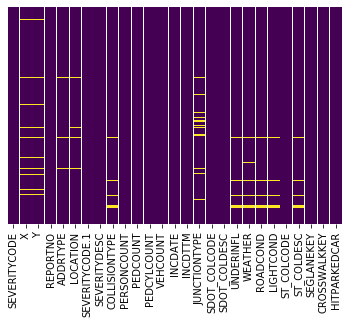

In [8]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Seems like some of our data is missing weather information as well as collision type. It also looks like it's the same row that's missing the majority of data so let's start off by removing rows from one of them and see what we end up with.

In [9]:
df.dropna(subset = ['WEATHER'], inplace =True)

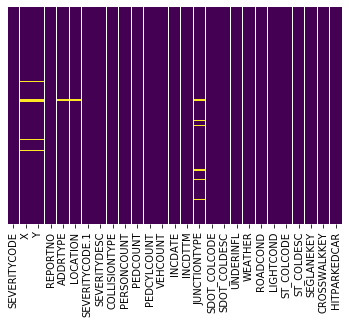

In [10]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

That seemed to clean up a lot of it! Unfortunately it seems like we are still missing some values on some of our data. Since we're working with a large dataset, let's just drop everything that's missing and go from there.

In [11]:
df.dropna(subset = ['LOCATION','X','JUNCTIONTYPE','LIGHTCOND','COLLISIONTYPE'], inplace =True)

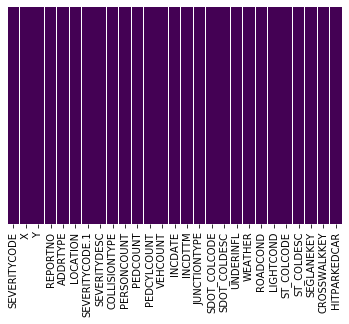

In [12]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Since the heatmap isn't seeing anything, let's doublecheck with a nullvalue sum call to make sure we deleted everything.

In [13]:
df.isnull().sum()

SEVERITYCODE       0
X                  0
Y                  0
REPORTNO           0
ADDRTYPE           0
LOCATION           0
SEVERITYCODE.1     0
SEVERITYDESC       0
COLLISIONTYPE      0
PERSONCOUNT        0
PEDCOUNT           0
PEDCYLCOUNT        0
VEHCOUNT           0
INCDATE            0
INCDTTM            0
JUNCTIONTYPE       0
SDOT_COLCODE       0
SDOT_COLDESC       0
UNDERINFL          0
WEATHER            0
ROADCOND          39
LIGHTCOND          0
ST_COLCODE         0
ST_COLDESC         0
SEGLANEKEY         0
CROSSWALKKEY       0
HITPARKEDCAR       0
dtype: int64

Looks like our Road condition column has missing values. Let's get rid of them.

In [14]:
df.dropna(subset = ['ROADCOND'],inplace = True)

# Exploratory Data Analysis
We now deleted all of our missing values! Now let's look at our main dependent feature and check it out.

In [15]:
df['SEVERITYCODE'].value_counts()

1    124258
2     55809
Name: SEVERITYCODE, dtype: int64

It looks like our severity code index is really skewed. We're going to have to do some over and/or under sampling in the future. But for now let's keep that in mind and keep going.

In [16]:
df['JUNCTIONTYPE'].value_counts()

Mid-Block (not related to intersection)              84513
At Intersection (intersection related)               60915
Mid-Block (but intersection related)                 22035
Driveway Junction                                    10430
At Intersection (but not related to intersection)     2030
Ramp Junction                                          139
Unknown                                                  5
Name: JUNCTIONTYPE, dtype: int64

Some junctions are unknown. Since it's only 5 rows let's remove the rows that contain unknown junctions types.


In [17]:
df = df[df['JUNCTIONTYPE'] != 'Unknown']

We can now move on to light conditions.

In [18]:
df['LIGHTCOND'].value_counts()

Daylight                    112214
Dark - Street Lights On      46682
Unknown                      10340
Dusk                          5707
Dawn                          2388
Dark - No Street Lights       1418
Dark - Street Lights Off      1130
Other                          172
Dark - Unknown Lighting         11
Name: LIGHTCOND, dtype: int64

It seems that there are some "unknown" light conditions. Also, there seems to be a lot of dark with conditions, since their dataset is so small compared to daylight we can combine them all to one. 

In [19]:
df['LIGHTCOND'] = df['LIGHTCOND'].replace({'Dark - Street Lights On': 'Dark', 'Dark - No Street Lights': 'Dark','Dark - Street Lights Off':'Dark','Dark - Unknown Lighting':'Dark'})

In [20]:
df['LIGHTCOND'].value_counts()

Daylight    112214
Dark         49241
Unknown      10340
Dusk          5707
Dawn          2388
Other          172
Name: LIGHTCOND, dtype: int64

For the unknown factor, let's take a look at the time factor to see if there's any correlation for our missing data.

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180062 entries, 0 to 194672
Data columns (total 27 columns):
SEVERITYCODE      180062 non-null int64
X                 180062 non-null float64
Y                 180062 non-null float64
REPORTNO          180062 non-null object
ADDRTYPE          180062 non-null object
LOCATION          180062 non-null object
SEVERITYCODE.1    180062 non-null int64
SEVERITYDESC      180062 non-null object
COLLISIONTYPE     180062 non-null object
PERSONCOUNT       180062 non-null int64
PEDCOUNT          180062 non-null int64
PEDCYLCOUNT       180062 non-null int64
VEHCOUNT          180062 non-null int64
INCDATE           180062 non-null object
INCDTTM           180062 non-null object
JUNCTIONTYPE      180062 non-null object
SDOT_COLCODE      180062 non-null int64
SDOT_COLDESC      180062 non-null object
UNDERINFL         180062 non-null object
WEATHER           180062 non-null object
ROADCOND          180062 non-null object
LIGHTCOND         180062 non-null

It appears that our date and time features are in object format. Let's change it to date time format first. 

In [22]:
df['INCDTTM'] = pd.to_datetime(df['INCDTTM'])

Now let's grab the daylight column since that column has the most values.

In [23]:
lightday = df[df['LIGHTCOND'] == 'Daylight']

In [24]:
lightday['INCDTTM'].value_counts()

2004-08-06 00:00:00    56
2006-06-01 00:00:00    56
2005-07-08 00:00:00    51
2008-10-03 00:00:00    50
2007-06-01 00:00:00    50
                       ..
2010-05-28 18:07:00     1
2012-04-25 08:01:00     1
2010-09-17 17:49:00     1
2014-11-29 13:28:00     1
2015-01-20 13:36:00     1
Name: INCDTTM, Length: 95659, dtype: int64

It appears that there is a lot of missing time values. Midnight is being counted as daytime, which is really weird. So we're not going to use any of that and just remove all of the unknown columns. 

In [25]:
df = df[df['LIGHTCOND'] != 'Unknown']

Before we move on to the rest, let's take a quick look at our date time rows. 

In [26]:
df['INCDTTM'].value_counts()

2006-11-02 00:00:00    87
2005-11-05 00:00:00    82
2008-10-03 00:00:00    80
2004-12-04 00:00:00    70
2006-04-08 00:00:00    67
                       ..
2012-09-15 02:14:00     1
2007-12-30 15:20:00     1
2019-04-25 15:02:00     1
2007-07-20 22:51:00     1
2019-07-12 09:45:00     1
Name: INCDTTM, Length: 144360, dtype: int64

We have a lot of values that are the same. This can cause some skewness if we were to use day of week in our feature extraction. Therefore, we will completely ignore day of week for now and see how our model holds up.

Now that we're done with light conditions, let's move on to road condition

In [27]:
df['ROADCOND'].value_counts()

Dry               118803
Wet                45031
Unknown             3634
Ice                 1101
Snow/Slush           847
Other                103
Standing Water        97
Sand/Mud/Dirt         58
Oil                   48
Name: ROADCOND, dtype: int64

There's some unknown variables here. Let's remove them.

In [28]:
df = df[df['ROADCOND'] != 'Unknown']

In [29]:
df = df[df['ROADCOND'] != 'Other']

Next up, we can look at the weather column.

In [30]:
df['WEATHER'].value_counts()

Clear                       105814
Raining                      31359
Overcast                     26159
Unknown                        897
Snowing                        810
Fog/Smog/Smoke                 533
Other                          235
Sleet/Hail/Freezing Rain       107
Blowing Sand/Dirt               42
Severe Crosswind                24
Partly Cloudy                    5
Name: WEATHER, dtype: int64

We'll also remove the unknowns here.

In [31]:
df = df[df['WEATHER'] != 'Unknown']

Now let's look at the address type column

In [32]:
df['ADDRTYPE'].value_counts()

Block           104092
Intersection     60996
Name: ADDRTYPE, dtype: int64

Seems that they're all filled out so we can move on to other columns.

In [33]:
df['UNDERINFL'].value_counts()

N    86562
0    69815
Y     4881
1     3830
Name: UNDERINFL, dtype: int64

According to the website, underinfl is checking if the driver was under the influence of drugs or alcohol. I assume that 0 is no, and 1 is yes for influence. So we're going to concat this into just two values, 0 and 1.

In [34]:
df['UNDERINFL'] = df['UNDERINFL'].replace({"N":"0","Y":"1"})

We're going to want to change the data type into integer instead of object. We'll do that at the end since there will be other values we'll need to fill out.

In [35]:
df['SEGLANEKEY'].value_counts()

0        162466
6532         19
6078         16
12162        14
10336        14
          ...  
8651          1
35934         1
15688         1
20038         1
14393         1
Name: SEGLANEKEY, Length: 1872, dtype: int64

In [36]:
df['CROSSWALKKEY'].value_counts()

0         161501
523609        16
520838        14
525567        13
523699        10
           ...  
32330          1
577500         1
29000          1
522373         1
31920          1
Name: CROSSWALKKEY, Length: 2110, dtype: int64

In [37]:
df['SEVERITYCODE.1'].value_counts()

1    110449
2     54639
Name: SEVERITYCODE.1, dtype: int64

These two columns don't seem to do too much. The third column appears to be a duplicate of the first. We'll remove these in a bit. We should check out the rest of the columns first. 

In [38]:
df['VEHCOUNT'].value_counts()

2     126359
1      23227
3      12277
4       2314
5        509
0        189
6        140
7         41
8         15
9          9
11         5
10         2
12         1
Name: VEHCOUNT, dtype: int64

In [39]:
df['COLLISIONTYPE'].value_counts()

Angles        33632
Parked Car    32375
Rear Ended    31613
Other         21007
Sideswipe     17056
Left Turn     13296
Pedestrian     6239
Cycles         5169
Right Turn     2775
Head On        1926
Name: COLLISIONTYPE, dtype: int64

In [40]:
df['ST_COLCODE'] = df['ST_COLCODE'].astype(int)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 165088 entries, 0 to 194672
Data columns (total 27 columns):
SEVERITYCODE      165088 non-null int64
X                 165088 non-null float64
Y                 165088 non-null float64
REPORTNO          165088 non-null object
ADDRTYPE          165088 non-null object
LOCATION          165088 non-null object
SEVERITYCODE.1    165088 non-null int64
SEVERITYDESC      165088 non-null object
COLLISIONTYPE     165088 non-null object
PERSONCOUNT       165088 non-null int64
PEDCOUNT          165088 non-null int64
PEDCYLCOUNT       165088 non-null int64
VEHCOUNT          165088 non-null int64
INCDATE           165088 non-null object
INCDTTM           165088 non-null datetime64[ns]
JUNCTIONTYPE      165088 non-null object
SDOT_COLCODE      165088 non-null int64
SDOT_COLDESC      165088 non-null object
UNDERINFL         165088 non-null object
WEATHER           165088 non-null object
ROADCOND          165088 non-null object
LIGHTCOND         165088 

In [42]:
df['PERSONCOUNT'].value_counts()

2     91438
3     33396
4     13914
1     10105
5      6350
0      5111
6      2618
7      1084
8       513
9       206
10      126
11       53
12       32
13       20
14       17
15       11
17       11
16        7
18        6
44        6
19        5
20        5
25        5
26        4
22        4
27        3
28        3
29        3
47        3
32        3
34        3
37        3
23        2
21        2
24        2
30        2
36        2
57        1
31        1
35        1
39        1
41        1
43        1
48        1
53        1
54        1
81        1
Name: PERSONCOUNT, dtype: int64

There's some crazy numbers on this list. 81 people injured, or 54 people injured in one accident? I think it's best if we look at the list and see what the numbers say.

In [43]:
df[df['PERSONCOUNT'] == 81]

,SEVERITYCODE,X,Y,REPORTNO,ADDRTYPE,LOCATION,SEVERITYCODE.1,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,...,SDOT_COLDESC,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
67134,2,-122.327861,47.620827,2616862,Intersection,MELROSE AVE E AND E THOMAS ST,2,Injury Collision,Other,81,...,MOTOR VEHICLE RAN OFF ROAD - HIT FIXED OBJECT,0,Clear,Snow/Slush,Daylight,50,Fixed object,0,0,N


While we cannot see the actual injuries/fatalities related to the personcount tab, I feel like a lot of the large ones just don't make too much sense. Let's remove the ones that have higher than 50 to see how our model works.

In [44]:
df = df[df['PERSONCOUNT'] < 50]

In [45]:
df['PERSONCOUNT'].value_counts()

2     91438
3     33396
4     13914
1     10105
5      6350
0      5111
6      2618
7      1084
8       513
9       206
10      126
11       53
12       32
13       20
14       17
15       11
17       11
16        7
44        6
18        6
20        5
19        5
25        5
26        4
22        4
29        3
47        3
37        3
34        3
27        3
28        3
32        3
21        2
23        2
24        2
30        2
36        2
31        1
35        1
39        1
41        1
43        1
48        1
Name: PERSONCOUNT, dtype: int64

Seems like that's about all the features we really need to look at. The one that's a little weird is the SDOT_COLCODE and DESC. I'm not sure if the model can recognise that number to an incident, but we'll keep it just in case.

Let's remove the rest of the columns and then turn our binary columns into values.

In [46]:
df.drop(['SEGLANEKEY','CROSSWALKKEY','INCDATE','INCDTTM','SEVERITYCODE.1'], axis =1, inplace = True)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 165084 entries, 0 to 194672
Data columns (total 22 columns):
SEVERITYCODE     165084 non-null int64
X                165084 non-null float64
Y                165084 non-null float64
REPORTNO         165084 non-null object
ADDRTYPE         165084 non-null object
LOCATION         165084 non-null object
SEVERITYDESC     165084 non-null object
COLLISIONTYPE    165084 non-null object
PERSONCOUNT      165084 non-null int64
PEDCOUNT         165084 non-null int64
PEDCYLCOUNT      165084 non-null int64
VEHCOUNT         165084 non-null int64
JUNCTIONTYPE     165084 non-null object
SDOT_COLCODE     165084 non-null int64
SDOT_COLDESC     165084 non-null object
UNDERINFL        165084 non-null object
WEATHER          165084 non-null object
ROADCOND         165084 non-null object
LIGHTCOND        165084 non-null object
ST_COLCODE       165084 non-null int32
ST_COLDESC       165084 non-null object
HITPARKEDCAR     165084 non-null object
dtypes: float6

In [48]:
df['HITPARKEDCAR'].replace(to_replace = ['N','Y'], value= [0,1], inplace= True)
df['ADDRTYPE'].replace(to_replace = ['Block','Intersection'], value= [0,1], inplace= True)
df['UNDERINFL'].replace(to_replace = ['0','1'], value = [0,1], inplace= True)

# Data visualization

Let's first import all of our stuff and grab the shape file of seattle.

In [49]:
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

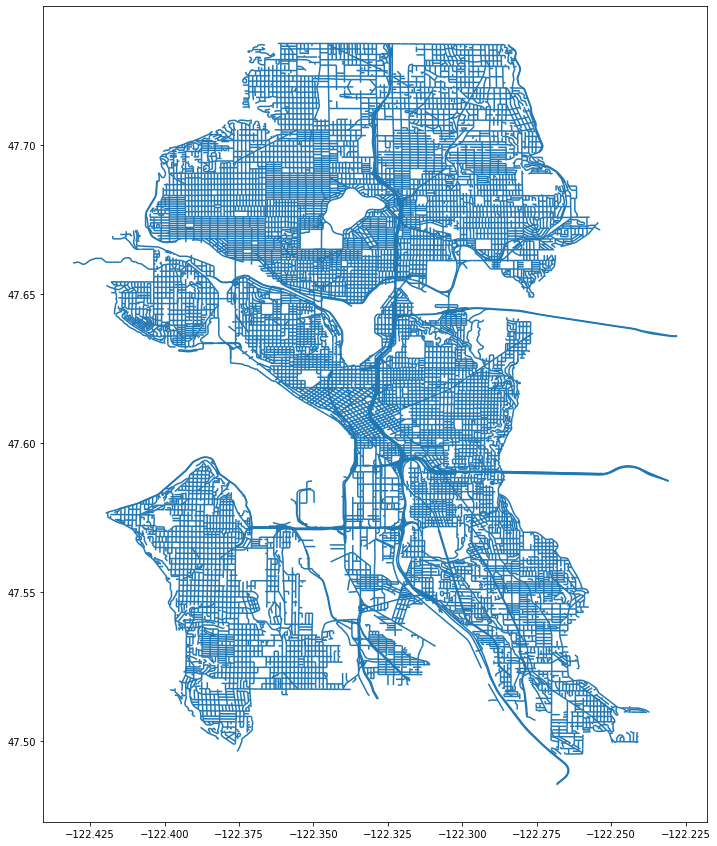

In [50]:
street_map = gpd.read_file('Seattle_Streets.shp')
fig,ax= plt.subplots(figsize=(15,15))
street_map.plot(ax=ax)

Now we can grab the CRS as well as create our geometry point using the X Y labels from our dataset.

In [51]:
crs = {'init':'epsg:4326'}
geometry = [Point(xy) for xy in zip(df["X"],df["Y"])]
geometry[:3]

Here we can create a geoframe dataset, and then plot all of our stuff based on severity code 

In [52]:
geo_df = gpd.GeoDataFrame(df,
                         crs=crs,
                         geometry=geometry)

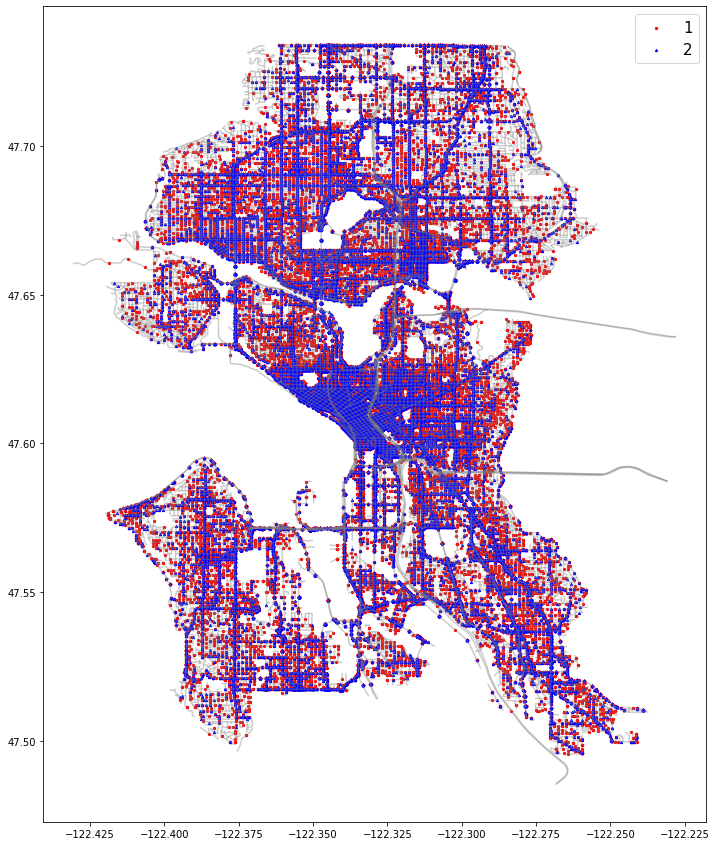

In [53]:
fig,ax = plt.subplots(figsize= (15,15))
street_map.plot(ax=ax,alpha=0.4,color='grey')
geo_df[geo_df['SEVERITYCODE'] == 1].plot(ax=ax,markersize=5,color='red',marker='o',label='1')
geo_df[geo_df['SEVERITYCODE'] == 2].plot(ax=ax,markersize=5,color='blue',marker='^',label='2')
plt.legend(prop={'size':15})

Let's break the database down to two, one for each severity code and check their values for each. 

In [54]:
code1 = df[df['SEVERITYCODE'] == 1]
code2 = df[df['SEVERITYCODE'] == 2]

Now let's check the value counts of each one to various calls. 

In [55]:
code1['WEATHER'].value_counts()

Clear                       70858
Raining                     20608
Overcast                    17690
Snowing                       648
Fog/Smog/Smoke                353
Other                         161
Sleet/Hail/Freezing Rain       80
Blowing Sand/Dirt              30
Severe Crosswind               17
Partly Cloudy                   2
Name: WEATHER, dtype: int64

In [56]:
code2['WEATHER'].value_counts()

Clear                       34954
Raining                     10749
Overcast                     8469
Fog/Smog/Smoke                180
Snowing                       162
Other                          74
Sleet/Hail/Freezing Rain       27
Blowing Sand/Dirt              12
Severe Crosswind                7
Partly Cloudy                   3
Name: WEATHER, dtype: int64

In [57]:
code1['ROADCOND'].value_counts()

Dry               79286
Wet               29553
Ice                 805
Snow/Slush          672
Standing Water       69
Sand/Mud/Dirt        35
Oil                  27
Name: ROADCOND, dtype: int64

In [58]:
code2['ROADCOND'].value_counts()

Dry               39003
Wet               15153
Ice                 259
Snow/Slush          155
Standing Water       26
Sand/Mud/Dirt        21
Oil                  20
Name: ROADCOND, dtype: int64

In [59]:
code1['COLLISIONTYPE'].value_counts()

Parked Car    29806
Angles        20274
Rear Ended    17796
Other         15391
Sideswipe     14700
Left Turn      7980
Right Turn     2185
Head On        1082
Pedestrian      629
Cycles          604
Name: COLLISIONTYPE, dtype: int64

In [60]:
code2['COLLISIONTYPE'].value_counts()

Rear Ended    13817
Angles        13358
Other          5614
Pedestrian     5610
Left Turn      5316
Cycles         4565
Parked Car     2569
Sideswipe      2355
Head On         844
Right Turn      589
Name: COLLISIONTYPE, dtype: int64

In [61]:
code1['UNDERINFL'].value_counts()

0    105160
1      5287
Name: UNDERINFL, dtype: int64

In [62]:
code2['UNDERINFL'].value_counts()

0    51213
1     3424
Name: UNDERINFL, dtype: int64

In [111]:
code1['LIGHTCOND'].value_counts()

Daylight    72127
Dark        33050
Dusk         3634
Dawn         1524
Other         112
Name: LIGHTCOND, dtype: int64

In [112]:
code2['LIGHTCOND'].value_counts()

Daylight    37382
Dark        14560
Dusk         1868
Dawn          791
Other          36
Name: LIGHTCOND, dtype: int64

In [113]:
code1['ADDRTYPE'].value_counts()

0    76182
1    34265
Name: ADDRTYPE, dtype: int64

In [114]:
code2['ADDRTYPE'].value_counts()

0    27908
1    26729
Name: ADDRTYPE, dtype: int64

# Feature extraction

In [115]:
Feature = df[['PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT','VEHCOUNT','SDOT_COLCODE','ST_COLCODE',"ADDRTYPE"]]
Feature = pd.concat([Feature,pd.get_dummies(df[['WEATHER','ROADCOND','LIGHTCOND']])], axis =1)
Feature.head()

,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,ST_COLCODE,ADDRTYPE,WEATHER_Blowing Sand/Dirt,WEATHER_Clear,WEATHER_Fog/Smog/Smoke,...,ROADCOND_Oil,ROADCOND_Sand/Mud/Dirt,ROADCOND_Snow/Slush,ROADCOND_Standing Water,ROADCOND_Wet,LIGHTCOND_Dark,LIGHTCOND_Dawn,LIGHTCOND_Daylight,LIGHTCOND_Dusk,LIGHTCOND_Other
0,2,0,0,2,11,10,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
1,2,0,0,2,16,11,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
2,4,0,0,3,14,32,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,3,0,0,3,11,23,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,2,0,0,2,11,10,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0


Now we can create our X variable. 

In [116]:
X = Feature

In [117]:
X.head()

,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,ST_COLCODE,ADDRTYPE,WEATHER_Blowing Sand/Dirt,WEATHER_Clear,WEATHER_Fog/Smog/Smoke,...,ROADCOND_Oil,ROADCOND_Sand/Mud/Dirt,ROADCOND_Snow/Slush,ROADCOND_Standing Water,ROADCOND_Wet,LIGHTCOND_Dark,LIGHTCOND_Dawn,LIGHTCOND_Daylight,LIGHTCOND_Dusk,LIGHTCOND_Other
0,2,0,0,2,11,10,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
1,2,0,0,2,16,11,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
2,4,0,0,3,14,32,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,3,0,0,3,11,23,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,2,0,0,2,11,10,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0


In [118]:
y = df['SEVERITYCODE'].values
y[0:5]

array([2, 1, 1, 1, 2], dtype=int64)

# Train test split

Import train test split and grab a sample from it. Since our dataset is large we'll do 70/30. 

In [119]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=101)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (115558, 29) (115558,)
Test set: (49526, 29) (49526,)


In [120]:
np.array(y_test)

array([2, 2, 1, ..., 2, 1, 1], dtype=int64)

# Oversampling
Before we contine, we will apply SMOTE

import libraries.

In [121]:
from imblearn.over_sampling import SMOTE

Check out the original values. 

In [122]:
unique, count = np.unique(y_train, return_counts = True)
Y_train_dict_value_count = {k:v for (k,v) in zip(unique,count)}
Y_train_dict_value_count

{1: 77290, 2: 38268}

Now let's apply SMOTE

In [123]:
sm = SMOTE(random_state= 12,)
x_train_res, y_train_res = sm.fit_sample(X_train, y_train)

Confirm that smote has been applied.

In [124]:
unique, count = np.unique(y_train_res, return_counts = True)
Y_smote_dict_value_count = {k:v for (k,v) in zip(unique,count)}
Y_smote_dict_value_count

{1: 77290, 2: 77290}

# Preprocessing

In [125]:
from sklearn.preprocessing import MinMaxScaler

In [126]:
scaler = MinMaxScaler()

In [127]:
scaler.fit(x_train_res)

MinMaxScaler()

In [128]:
x_train = scaler.transform(x_train_res)
x_test = scaler.transform(X_test)

# Decision Tree
Import decision tree

In [129]:
from sklearn.tree import DecisionTreeClassifier
sevcode = DecisionTreeClassifier(criterion="entropy", max_depth = 4)

In [130]:
sevcode.fit(x_train, y_train_res)
sevpred = sevcode.predict(x_test)

Now we can calculate accuracy and f1 score 

In [131]:
from sklearn import metrics

In [132]:
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, sevpred))

DecisionTrees's Accuracy:  0.6850139320760813


In [133]:
from sklearn.metrics import f1_score
print("Avg F1-score: %.4f" % f1_score(y_test, sevpred, average='weighted'))

Avg F1-score: 0.6881


Around 68 % on both of them. Let's try out Logistic regression instead. 

# Logistic Regression

In [134]:
from sklearn.linear_model import LogisticRegression


In [135]:
LR = LogisticRegression(C=0.01, solver='liblinear').fit(x_train,y_train_res)


In [136]:
lrpred = LR.predict(x_test)
print("LR's Accuracy: ", metrics.accuracy_score(y_test, lrpred))
print("Avg F1-score: %.4f" % f1_score(y_test, lrpred, average='weighted'))

LR's Accuracy:  0.6515769494810807
Avg F1-score: 0.6543


It seems that decision tree is a better model for this prediction in general. 

We can also try it with SVM 

# SVM

In [144]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(x_train, y_train_res) 

SVC()

In [145]:
clfpred = clf.predict(x_test)
print("SVM's Accuracy: ", metrics.accuracy_score(y_test, clfpred))
print("Avg F1-score: %.4f" % f1_score(y_test, clfpred, average='weighted'))

SVM's Accuracy:  0.6541816419658362
Avg F1-score: 0.6608


# Creating a database for models

In [146]:
report = pd.DataFrame(columns =['Algorithm','Accuracy','F1-Score'])
report['Algorithm'] = ['Decision Tree','Logistic Regression','SVM']
report['Accuracy'] = [metrics.accuracy_score(y_test, sevpred),metrics.accuracy_score(y_test, lrpred),metrics.accuracy_score(y_test, clfpred)]
report['F1-Score'] = [f1_score(y_test, sevpred, average='weighted'),f1_score(y_test, lrpred, average='weighted'),f1_score(y_test, clfpred, average='weighted')]
report.head()

,Algorithm,Accuracy,F1-Score
0,Decision Tree,0.685014,0.688088
1,Logistic Regression,0.651577,0.654315
2,SVM,0.654182,0.660779



# Conclusion
Overall, it seems that the data given isn't fully sufficient to determine the severity of the accident. Some of the data seems to be lacking though - if the dates were better, maybe we could use the day of week to predict whether or not the accident would be severe. Also, if we had more data on things like driver's age, and maybe some pre-existing conditions of the driver that caused such things. 